In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.
(1000, 5)
(5, 500)
(1000, 500)


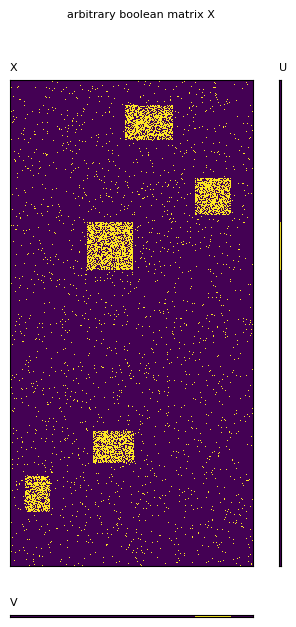

In [13]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [14]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 1. Manually select tau
k and w are not effective here.

In [15]:
# k = 5
# tau_list = [0.10, 0.20, 0.30]
# w = [0.8, 0.2]

# for tau in tau_list:
#     asso = Asso(k=k, tau=tau, w=w)
#     # plot assoc and basis
#     asso._fit_prepare(X_train, display=True)

### 2. Grid search for w
Use some small k and selected tau for trials.

In [16]:
k = 5
tau_list = [0.10]
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4]] # [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
from utils import add_log

metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.4, 0.6]
[I] display : False
[W] Missing validation data.
[I] display : True


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:20<00:00,  4.09s/it]

(1000, 500)
(1000, 5)
(5, 500)


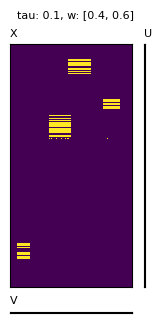

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 18:59:01.287648,5,0.1,0.4,0.6,0.351061,0.645003,0.047378,0.952622,0.454661


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 18:59:06.447789,5,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.5, 0.5]
[I] display : False
[W] Missing validation data.
[I] display : True


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:21<00:00,  4.40s/it]


(1000, 500)
(1000, 5)
(5, 500)


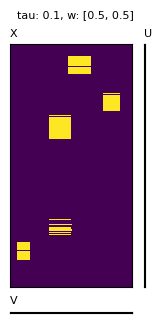

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 18:59:01.287648,5,0.1,0.4,0.6,0.351061,0.645003,0.047378,0.952622,0.454661
1,2023-12-06 18:59:29.001210,5,0.1,0.5,0.5,0.609620,0.603442,0.044500,0.955500,0.606515


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 18:59:06.447789,5,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
1,2023-12-06 18:59:33.870373,5,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.
[I] display : True


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


(1000, 500)
(1000, 5)
(5, 500)


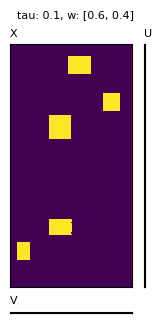

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 18:59:01.287648,5,0.1,0.4,0.6,0.351061,0.645003,0.047378,0.952622,0.454661
1,2023-12-06 18:59:29.001210,5,0.1,0.5,0.5,0.609620,0.603442,0.044500,0.955500,0.606515
2,2023-12-06 18:59:54.327356,5,0.1,0.6,0.4,0.669274,0.589491,0.044826,0.955174,0.626854


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 18:59:06.447789,5,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
1,2023-12-06 18:59:33.870373,5,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471
2,2023-12-06 18:59:59.177685,5,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874


In [17]:
for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, display=True)

        results = asso.eval(X_test, metrics=metrics, task='reconstruction')
        add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

        # to see the difference of 'prediction' and 'reconstruction'
        # 'prediction' task without validation will cause overfit
        results = asso.eval(X_test, metrics=metrics, task='prediction')
        add_log(df_prediction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

### 3. Get k
Given tau and w.

In [20]:
k = 10 # more than ground truth
tau_list = [0.10]
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4]]

for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, X_val, display=False) # load X_val to activate per-step eval

        display(asso.df_eval)

[I] k            : 10
[I] tau          : 0.1
[I] weights      : [0.4, 0.6]
[I] display : False
[I] display : False


  0%|          | 0/10 [00:00<?, ?it/s]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:08:59.407554,0,0.1,0.4,0.6,0.145615,1.0,0.854385,0.145615,0.254213


 10%|█         | 1/10 [00:08<01:17,  8.58s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:08:59.407554,0,0.1,0.4,0.6,0.145615,1.0,0.854385,0.145615,0.254213
1,2023-12-06 19:09:08.327082,1,0.1,0.4,0.6,0.212272,1.0,0.787728,0.212272,0.350205


 20%|██        | 2/10 [00:17<01:10,  8.79s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:08:59.407554,0,0.1,0.4,0.6,0.145615,1.0,0.854385,0.145615,0.254213
1,2023-12-06 19:09:08.327082,1,0.1,0.4,0.6,0.212272,1.0,0.787728,0.212272,0.350205
2,2023-12-06 19:09:17.094280,2,0.1,0.4,0.6,0.294216,1.0,0.705784,0.294216,0.454663


 30%|███       | 3/10 [00:26<01:01,  8.78s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:08:59.407554,0,0.1,0.4,0.6,0.145615,1.0,0.854385,0.145615,0.254213
1,2023-12-06 19:09:08.327082,1,0.1,0.4,0.6,0.212272,1.0,0.787728,0.212272,0.350205
2,2023-12-06 19:09:17.094280,2,0.1,0.4,0.6,0.294216,1.0,0.705784,0.294216,0.454663
3,2023-12-06 19:09:25.925548,3,0.1,0.4,0.6,0.345586,1.0,0.654414,0.345586,0.513659


 40%|████      | 4/10 [00:35<00:52,  8.79s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:08:59.407554,0,0.1,0.4,0.6,0.145615,1.0,0.854385,0.145615,0.254213
1,2023-12-06 19:09:08.327082,1,0.1,0.4,0.6,0.212272,1.0,0.787728,0.212272,0.350205
2,2023-12-06 19:09:17.094280,2,0.1,0.4,0.6,0.294216,1.0,0.705784,0.294216,0.454663
3,2023-12-06 19:09:25.925548,3,0.1,0.4,0.6,0.345586,1.0,0.654414,0.345586,0.513659
4,2023-12-06 19:09:34.343173,4,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682


 50%|█████     | 5/10 [00:43<00:43,  8.66s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 19:09:08.327082,1,0.1,0.4,0.6,0.212272,1.0,0.787728,0.212272,0.350205
2,2023-12-06 19:09:17.094280,2,0.1,0.4,0.6,0.294216,1.0,0.705784,0.294216,0.454663
3,2023-12-06 19:09:25.925548,3,0.1,0.4,0.6,0.345586,1.0,0.654414,0.345586,0.513659
4,2023-12-06 19:09:34.343173,4,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
5,2023-12-06 19:09:42.793516,5,0.1,0.4,0.6,0.354758,1.0,0.645242,0.354758,0.523722


 60%|██████    | 6/10 [00:51<00:34,  8.59s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
2,2023-12-06 19:09:17.094280,2,0.1,0.4,0.6,0.294216,1.0,0.705784,0.294216,0.454663
3,2023-12-06 19:09:25.925548,3,0.1,0.4,0.6,0.345586,1.0,0.654414,0.345586,0.513659
4,2023-12-06 19:09:34.343173,4,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
5,2023-12-06 19:09:42.793516,5,0.1,0.4,0.6,0.354758,1.0,0.645242,0.354758,0.523722
6,2023-12-06 19:09:51.443610,6,0.1,0.4,0.6,0.356358,1.0,0.643642,0.356358,0.525463


 70%|███████   | 7/10 [01:00<00:25,  8.61s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
3,2023-12-06 19:09:25.925548,3,0.1,0.4,0.6,0.345586,1.0,0.654414,0.345586,0.513659
4,2023-12-06 19:09:34.343173,4,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
5,2023-12-06 19:09:42.793516,5,0.1,0.4,0.6,0.354758,1.0,0.645242,0.354758,0.523722
6,2023-12-06 19:09:51.443610,6,0.1,0.4,0.6,0.356358,1.0,0.643642,0.356358,0.525463
7,2023-12-06 19:10:00.644825,7,0.1,0.4,0.6,0.357638,1.0,0.642362,0.357638,0.526853


 80%|████████  | 8/10 [01:09<00:17,  8.80s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
4,2023-12-06 19:09:34.343173,4,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
5,2023-12-06 19:09:42.793516,5,0.1,0.4,0.6,0.354758,1.0,0.645242,0.354758,0.523722
6,2023-12-06 19:09:51.443610,6,0.1,0.4,0.6,0.356358,1.0,0.643642,0.356358,0.525463
7,2023-12-06 19:10:00.644825,7,0.1,0.4,0.6,0.357638,1.0,0.642362,0.357638,0.526853
8,2023-12-06 19:10:09.348346,8,0.1,0.4,0.6,0.359522,1.0,0.640478,0.359522,0.528895


 90%|█████████ | 9/10 [01:18<00:08,  8.77s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
5,2023-12-06 19:09:42.793516,5,0.1,0.4,0.6,0.354758,1.0,0.645242,0.354758,0.523722
6,2023-12-06 19:09:51.443610,6,0.1,0.4,0.6,0.356358,1.0,0.643642,0.356358,0.525463
7,2023-12-06 19:10:00.644825,7,0.1,0.4,0.6,0.357638,1.0,0.642362,0.357638,0.526853
8,2023-12-06 19:10:09.348346,8,0.1,0.4,0.6,0.359522,1.0,0.640478,0.359522,0.528895
9,2023-12-06 19:10:18.346319,9,0.1,0.4,0.6,0.362402,1.0,0.637598,0.362402,0.532004


100%|██████████| 10/10 [01:27<00:00,  8.75s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:08:59.407554,0,0.1,0.4,0.6,0.145615,1.0,0.854385,0.145615,0.254213
1,2023-12-06 19:09:08.327082,1,0.1,0.4,0.6,0.212272,1.0,0.787728,0.212272,0.350205
2,2023-12-06 19:09:17.094280,2,0.1,0.4,0.6,0.294216,1.0,0.705784,0.294216,0.454663
3,2023-12-06 19:09:25.925548,3,0.1,0.4,0.6,0.345586,1.0,0.654414,0.345586,0.513659
4,2023-12-06 19:09:34.343173,4,0.1,0.4,0.6,0.351061,1.0,0.648939,0.351061,0.519682
5,2023-12-06 19:09:42.793516,5,0.1,0.4,0.6,0.354758,1.0,0.645242,0.354758,0.523722
6,2023-12-06 19:09:51.443610,6,0.1,0.4,0.6,0.356358,1.0,0.643642,0.356358,0.525463
7,2023-12-06 19:10:00.644825,7,0.1,0.4,0.6,0.357638,1.0,0.642362,0.357638,0.526853
8,2023-12-06 19:10:09.348346,8,0.1,0.4,0.6,0.359522,1.0,0.640478,0.359522,0.528895
9,2023-12-06 19:10:18.346319,9,0.1,0.4,0.6,0.362402,1.0,0.637598,0.362402,0.532004


[I] k            : 10
[I] tau          : 0.1
[I] weights      : [0.5, 0.5]
[I] display : False
[I] display : False


  0%|          | 0/10 [00:00<?, ?it/s]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:10:26.844364,0,0.1,0.5,0.5,0.266095,1.0,0.733905,0.266095,0.42034


 10%|█         | 1/10 [00:08<01:13,  8.19s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:10:26.844364,0,0.1,0.5,0.5,0.266095,1.0,0.733905,0.266095,0.420340
1,2023-12-06 19:10:35.346184,1,0.1,0.5,0.5,0.409720,1.0,0.590280,0.409720,0.581278


 20%|██        | 2/10 [00:16<01:06,  8.37s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:10:26.844364,0,0.1,0.5,0.5,0.266095,1.0,0.733905,0.266095,0.420340
1,2023-12-06 19:10:35.346184,1,0.1,0.5,0.5,0.409720,1.0,0.590280,0.409720,0.581278
2,2023-12-06 19:10:44.366734,2,0.1,0.5,0.5,0.524583,1.0,0.475417,0.524583,0.688166


 30%|███       | 3/10 [00:25<01:00,  8.68s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:10:26.844364,0,0.1,0.5,0.5,0.266095,1.0,0.733905,0.266095,0.420340
1,2023-12-06 19:10:35.346184,1,0.1,0.5,0.5,0.409720,1.0,0.590280,0.409720,0.581278
2,2023-12-06 19:10:44.366734,2,0.1,0.5,0.5,0.524583,1.0,0.475417,0.524583,0.688166
3,2023-12-06 19:10:53.333726,3,0.1,0.5,0.5,0.601941,1.0,0.398059,0.601941,0.751515


 40%|████      | 4/10 [00:34<00:52,  8.79s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:10:26.844364,0,0.1,0.5,0.5,0.266095,1.0,0.733905,0.266095,0.420340
1,2023-12-06 19:10:35.346184,1,0.1,0.5,0.5,0.409720,1.0,0.590280,0.409720,0.581278
2,2023-12-06 19:10:44.366734,2,0.1,0.5,0.5,0.524583,1.0,0.475417,0.524583,0.688166
3,2023-12-06 19:10:53.333726,3,0.1,0.5,0.5,0.601941,1.0,0.398059,0.601941,0.751515
4,2023-12-06 19:11:02.546767,4,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471


 50%|█████     | 5/10 [00:43<00:44,  8.95s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 19:10:35.346184,1,0.1,0.5,0.5,0.409720,1.0,0.590280,0.409720,0.581278
2,2023-12-06 19:10:44.366734,2,0.1,0.5,0.5,0.524583,1.0,0.475417,0.524583,0.688166
3,2023-12-06 19:10:53.333726,3,0.1,0.5,0.5,0.601941,1.0,0.398059,0.601941,0.751515
4,2023-12-06 19:11:02.546767,4,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471
5,2023-12-06 19:11:11.516875,5,0.1,0.5,0.5,0.613922,1.0,0.386078,0.613922,0.760782


 60%|██████    | 6/10 [00:52<00:35,  8.95s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
2,2023-12-06 19:10:44.366734,2,0.1,0.5,0.5,0.524583,1.0,0.475417,0.524583,0.688166
3,2023-12-06 19:10:53.333726,3,0.1,0.5,0.5,0.601941,1.0,0.398059,0.601941,0.751515
4,2023-12-06 19:11:02.546767,4,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471
5,2023-12-06 19:11:11.516875,5,0.1,0.5,0.5,0.613922,1.0,0.386078,0.613922,0.760782
6,2023-12-06 19:11:20.500763,6,0.1,0.5,0.5,0.615344,1.0,0.384656,0.615344,0.761873


 70%|███████   | 7/10 [01:01<00:26,  8.96s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
3,2023-12-06 19:10:53.333726,3,0.1,0.5,0.5,0.601941,1.0,0.398059,0.601941,0.751515
4,2023-12-06 19:11:02.546767,4,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471
5,2023-12-06 19:11:11.516875,5,0.1,0.5,0.5,0.613922,1.0,0.386078,0.613922,0.760782
6,2023-12-06 19:11:20.500763,6,0.1,0.5,0.5,0.615344,1.0,0.384656,0.615344,0.761873
7,2023-12-06 19:11:29.584741,7,0.1,0.5,0.5,0.618401,1.0,0.381599,0.618401,0.764212


 80%|████████  | 8/10 [01:10<00:17,  9.00s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
4,2023-12-06 19:11:02.546767,4,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471
5,2023-12-06 19:11:11.516875,5,0.1,0.5,0.5,0.613922,1.0,0.386078,0.613922,0.760782
6,2023-12-06 19:11:20.500763,6,0.1,0.5,0.5,0.615344,1.0,0.384656,0.615344,0.761873
7,2023-12-06 19:11:29.584741,7,0.1,0.5,0.5,0.618401,1.0,0.381599,0.618401,0.764212
8,2023-12-06 19:11:38.533076,8,0.1,0.5,0.5,0.618685,1.0,0.381315,0.618685,0.764429


 90%|█████████ | 9/10 [01:19<00:08,  8.99s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
5,2023-12-06 19:11:11.516875,5,0.1,0.5,0.5,0.613922,1.0,0.386078,0.613922,0.760782
6,2023-12-06 19:11:20.500763,6,0.1,0.5,0.5,0.615344,1.0,0.384656,0.615344,0.761873
7,2023-12-06 19:11:29.584741,7,0.1,0.5,0.5,0.618401,1.0,0.381599,0.618401,0.764212
8,2023-12-06 19:11:38.533076,8,0.1,0.5,0.5,0.618685,1.0,0.381315,0.618685,0.764429
9,2023-12-06 19:11:47.723796,9,0.1,0.5,0.5,0.618899,1.0,0.381101,0.618899,0.764592


100%|██████████| 10/10 [01:29<00:00,  8.91s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:10:26.844364,0,0.1,0.5,0.5,0.266095,1.0,0.733905,0.266095,0.420340
1,2023-12-06 19:10:35.346184,1,0.1,0.5,0.5,0.409720,1.0,0.590280,0.409720,0.581278
2,2023-12-06 19:10:44.366734,2,0.1,0.5,0.5,0.524583,1.0,0.475417,0.524583,0.688166
3,2023-12-06 19:10:53.333726,3,0.1,0.5,0.5,0.601941,1.0,0.398059,0.601941,0.751515
4,2023-12-06 19:11:02.546767,4,0.1,0.5,0.5,0.609620,1.0,0.390380,0.609620,0.757471
5,2023-12-06 19:11:11.516875,5,0.1,0.5,0.5,0.613922,1.0,0.386078,0.613922,0.760782
6,2023-12-06 19:11:20.500763,6,0.1,0.5,0.5,0.615344,1.0,0.384656,0.615344,0.761873
7,2023-12-06 19:11:29.584741,7,0.1,0.5,0.5,0.618401,1.0,0.381599,0.618401,0.764212
8,2023-12-06 19:11:38.533076,8,0.1,0.5,0.5,0.618685,1.0,0.381315,0.618685,0.764429
9,2023-12-06 19:11:47.723796,9,0.1,0.5,0.5,0.618899,1.0,0.381101,0.618899,0.764592


[I] k            : 10
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[I] display : False


  0%|          | 0/10 [00:00<?, ?it/s]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:11:56.439572,0,0.1,0.6,0.4,0.314089,1.0,0.685911,0.314089,0.478033


 10%|█         | 1/10 [00:08<01:15,  8.42s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:11:56.439572,0,0.1,0.6,0.4,0.314089,1.0,0.685911,0.314089,0.478033
1,2023-12-06 19:12:05.192201,1,0.1,0.6,0.4,0.466174,1.0,0.533826,0.466174,0.635905


 20%|██        | 2/10 [00:17<01:08,  8.61s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:11:56.439572,0,0.1,0.6,0.4,0.314089,1.0,0.685911,0.314089,0.478033
1,2023-12-06 19:12:05.192201,1,0.1,0.6,0.4,0.466174,1.0,0.533826,0.466174,0.635905
2,2023-12-06 19:12:14.244252,2,0.1,0.6,0.4,0.583455,1.0,0.416545,0.583455,0.736939


 30%|███       | 3/10 [00:26<01:01,  8.81s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:11:56.439572,0,0.1,0.6,0.4,0.314089,1.0,0.685911,0.314089,0.478033
1,2023-12-06 19:12:05.192201,1,0.1,0.6,0.4,0.466174,1.0,0.533826,0.466174,0.635905
2,2023-12-06 19:12:14.244252,2,0.1,0.6,0.4,0.583455,1.0,0.416545,0.583455,0.736939
3,2023-12-06 19:12:23.392069,3,0.1,0.6,0.4,0.665079,1.0,0.334921,0.665079,0.798856


 40%|████      | 4/10 [00:35<00:53,  8.94s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:11:56.439572,0,0.1,0.6,0.4,0.314089,1.0,0.685911,0.314089,0.478033
1,2023-12-06 19:12:05.192201,1,0.1,0.6,0.4,0.466174,1.0,0.533826,0.466174,0.635905
2,2023-12-06 19:12:14.244252,2,0.1,0.6,0.4,0.583455,1.0,0.416545,0.583455,0.736939
3,2023-12-06 19:12:23.392069,3,0.1,0.6,0.4,0.665079,1.0,0.334921,0.665079,0.798856
4,2023-12-06 19:12:32.744462,4,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874


 50%|█████     | 5/10 [00:44<00:45,  9.10s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 19:12:05.192201,1,0.1,0.6,0.4,0.466174,1.0,0.533826,0.466174,0.635905
2,2023-12-06 19:12:14.244252,2,0.1,0.6,0.4,0.583455,1.0,0.416545,0.583455,0.736939
3,2023-12-06 19:12:23.392069,3,0.1,0.6,0.4,0.665079,1.0,0.334921,0.665079,0.798856
4,2023-12-06 19:12:32.744462,4,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874
5,2023-12-06 19:12:41.982116,5,0.1,0.6,0.4,0.669558,1.0,0.330442,0.669558,0.802078


 60%|██████    | 6/10 [00:53<00:36,  9.14s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
2,2023-12-06 19:12:14.244252,2,0.1,0.6,0.4,0.583455,1.0,0.416545,0.583455,0.736939
3,2023-12-06 19:12:23.392069,3,0.1,0.6,0.4,0.665079,1.0,0.334921,0.665079,0.798856
4,2023-12-06 19:12:32.744462,4,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874
5,2023-12-06 19:12:41.982116,5,0.1,0.6,0.4,0.669558,1.0,0.330442,0.669558,0.802078
6,2023-12-06 19:12:51.614586,6,0.1,0.6,0.4,0.669771,1.0,0.330229,0.669771,0.802231


 70%|███████   | 7/10 [01:03<00:27,  9.30s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
3,2023-12-06 19:12:23.392069,3,0.1,0.6,0.4,0.665079,1.0,0.334921,0.665079,0.798856
4,2023-12-06 19:12:32.744462,4,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874
5,2023-12-06 19:12:41.982116,5,0.1,0.6,0.4,0.669558,1.0,0.330442,0.669558,0.802078
6,2023-12-06 19:12:51.614586,6,0.1,0.6,0.4,0.669771,1.0,0.330229,0.669771,0.802231
7,2023-12-06 19:13:01.200193,7,0.1,0.6,0.4,0.669985,1.0,0.330015,0.669985,0.802384


 80%|████████  | 8/10 [01:13<00:18,  9.39s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
4,2023-12-06 19:12:32.744462,4,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874
5,2023-12-06 19:12:41.982116,5,0.1,0.6,0.4,0.669558,1.0,0.330442,0.669558,0.802078
6,2023-12-06 19:12:51.614586,6,0.1,0.6,0.4,0.669771,1.0,0.330229,0.669771,0.802231
7,2023-12-06 19:13:01.200193,7,0.1,0.6,0.4,0.669985,1.0,0.330015,0.669985,0.802384
8,2023-12-06 19:13:10.606850,8,0.1,0.6,0.4,0.670198,1.0,0.329802,0.670198,0.802537


 90%|█████████ | 9/10 [01:22<00:09,  9.39s/it]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
5,2023-12-06 19:12:41.982116,5,0.1,0.6,0.4,0.669558,1.0,0.330442,0.669558,0.802078
6,2023-12-06 19:12:51.614586,6,0.1,0.6,0.4,0.669771,1.0,0.330229,0.669771,0.802231
7,2023-12-06 19:13:01.200193,7,0.1,0.6,0.4,0.669985,1.0,0.330015,0.669985,0.802384
8,2023-12-06 19:13:10.606850,8,0.1,0.6,0.4,0.670198,1.0,0.329802,0.670198,0.802537
9,2023-12-06 19:13:20.151404,9,0.1,0.6,0.4,0.670411,1.0,0.329589,0.670411,0.802690


100%|██████████| 10/10 [01:32<00:00,  9.21s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:11:56.439572,0,0.1,0.6,0.4,0.314089,1.0,0.685911,0.314089,0.478033
1,2023-12-06 19:12:05.192201,1,0.1,0.6,0.4,0.466174,1.0,0.533826,0.466174,0.635905
2,2023-12-06 19:12:14.244252,2,0.1,0.6,0.4,0.583455,1.0,0.416545,0.583455,0.736939
3,2023-12-06 19:12:23.392069,3,0.1,0.6,0.4,0.665079,1.0,0.334921,0.665079,0.798856
4,2023-12-06 19:12:32.744462,4,0.1,0.6,0.4,0.669274,1.0,0.330726,0.669274,0.801874
5,2023-12-06 19:12:41.982116,5,0.1,0.6,0.4,0.669558,1.0,0.330442,0.669558,0.802078
6,2023-12-06 19:12:51.614586,6,0.1,0.6,0.4,0.669771,1.0,0.330229,0.669771,0.802231
7,2023-12-06 19:13:01.200193,7,0.1,0.6,0.4,0.669985,1.0,0.330015,0.669985,0.802384
8,2023-12-06 19:13:10.606850,8,0.1,0.6,0.4,0.670198,1.0,0.329802,0.670198,0.802537
9,2023-12-06 19:13:20.151404,9,0.1,0.6,0.4,0.670411,1.0,0.329589,0.670411,0.802690
